This nb contains stuff moved out from the final versions of part1-3

#### Exercise: 
* Report the mean, min. and max. death toll on Jan. 25 2021? Write the answer into a markdown cell.
* Calculate the total case number on Jan. 25 2021. Hint: `sum()`

In [10]:
deaths.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  273.000000  273.000000  275.000000  275.000000  275.000000  275.000000   
mean    20.534804   23.028143    0.061818    0.065455    0.094545    0.152727   
std     25.194592   73.596166    1.025139    1.026691    1.449316    2.413152   
min    -51.796300 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      5.152149  -19.020800    0.000000    0.000000    0.000000    0.000000   
50%     21.694000   20.939400    0.000000    0.000000    0.000000    0.000000   
75%     41.112900   84.250000    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   17.000000   17.000000   24.000000   40.000000   

          1/26/20     1/27/20     1/28/20     1/29/20  ...        4/17/21  \
count  275.000000  275.000000  275.000000  275.000000  ...     275.000000   
mean     0.203636    0.298182    0.476364    0.483636  ...   10948.545455   
std      3.137131    4.583989    7.537884    7.538387  ...   46823.062528   
min      0.000000    0.000000    0.000000    0.000000  ...       0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...       7.500000   
50%      0.000000    0.000000    0.000000    0.000000  ...     189.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    3113.500000   
max     52.000000   76.000000  125.000000  125.000000  ...  567027.000000   

             4/18/21        4/19/21        4/20/21        4/21/21  \
count     275.000000     275.000000     275.000000     275.000000   
mean    10979.843636   11017.985455   11069.578182   11120.850909   
std     46918.855178   47022.662009   47210.202013   47403.127721   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.500000       7.500000       7.500000       7.500000   
50%       192.000000     193.000000     194.000000     194.000000   
75%      3119.000000    3129.500000    3134.500000    3143.500000   
max    567344.000000  567825.000000  568649.000000  569491.000000   

             4/22/21        4/23/21        4/24/21        4/25/21  \
count     275.000000     275.000000     275.000000     275.000000   
mean    11170.774545   11222.367273   11270.789091   11306.352727   
std     47563.529577   47744.103309   47925.822480   48029.841943   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.500000       7.500000       7.500000       7.500000   
50%       194.000000     194.000000     195.000000     196.000000   
75%      3153.000000    3164.000000    3174.500000    3186.500000   
max    570434.000000  571197.000000  571921.000000  572200.000000   

             4/26/21  
count     275.000000  
mean    11346.920000  
std     48143.735612  
min         0.000000  
25%         7.500000  
50%       201.000000  
75%      3195.500000  
max    572674.000000  

[8 rows x 463 columns]

#### Answers:
The min and max death toll on Jan. 25 2020 was 0 and 40, respectively.

The sum can be calculated from the `mean` and `count`:

In [11]:
total_deaths = 275 * 0.153285

In [12]:
md(f"There were {int(total_deaths)} death cases on Jan. 25 2020.")

There were 42 death cases on Jan. 25 2020.

##### Variation: Selecting a column from the dataframe

In [13]:
deaths.describe().loc[['min', 'max', 'mean'],'1/25/20']

min      0.000000
max     40.000000
mean     0.152727
Name: 1/25/20, dtype: float64

In [14]:
md(f"Jan. 25 2020: {deaths['1/25/20'].mean() * deaths['1/25/20'].count()} deaths.")

Jan. 25 2020: 42.0 deaths.

In [133]:
## Correlation between case numbers in different countries.

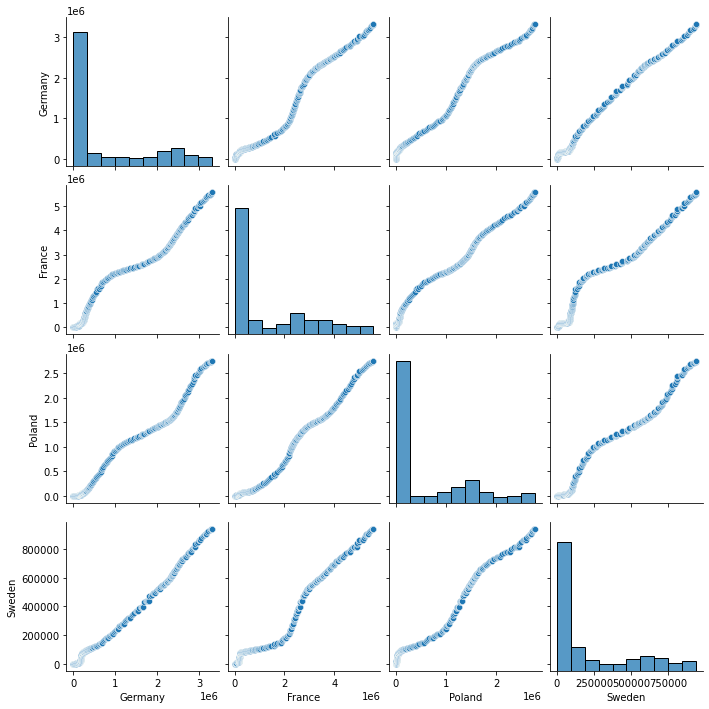

In [134]:
seaborn.pairplot(cases.loc[:,countries_of_interest])

#### Exercise:
Make a scatterplot that shows the number of deaths vs. the case numbers in Germany between March and August 2020.
**Hints**:
* Extract the cases and deaths for the relevant time frame and country.
* Transpose the result
* Rename the single column to "deaths".

In [139]:
deaths_Germany = deaths.set_index("Country/Region").loc["Germany","3/1/20":"8/31/20"].T

In [151]:
deaths_Germany.name = "deaths"

In [152]:
# Solution.
cases_Germany = confirmed_cases.set_index("Country/Region").loc["Germany","3/1/20":"8/31/20"].T
cases_Germany.name = "cases"

In [153]:
germany_data = pd.concat([deaths_Germany, cases_Germany], axis=1)

In [154]:
germany_data

deaths   cases
3/1/20       0     130
3/2/20       0     159
3/3/20       0     196
3/4/20       0     262
3/5/20       0     482
...        ...     ...
8/27/20   9290  240571
8/28/20   9290  242126
8/29/20   9299  242835
8/30/20   9300  243305
8/31/20   9303  244802

[184 rows x 2 columns]

<AxesSubplot:xlabel='cases', ylabel='deaths'>

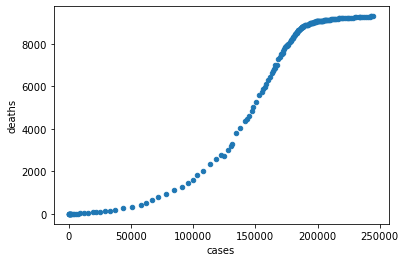

In [155]:
germany_data.plot.scatter(x='cases', y='deaths')

## Filter, query data from a table
### Select a column

In [19]:
confirmed_cases.loc[:,"4/23/21"]

0       58542
1      130270
2      120562
3       13007
4       25279
        ...  
270      2830
271    289120
272      6056
273     91251
274     38045
Name: 4/23/21, Length: 275, dtype: int64

### Select multiple columns

In [20]:
confirmed_cases.loc[:,["3/23/21", "4/23/21"]]

3/23/21  4/23/21
0      56177    58542
1     121847   130270
2     116349   120562
3      11591    13007
4      21774    25279
..       ...      ...
270     2575     2830
271   228044   289120
272     3612     6056
273    86779    91251
274    36717    38045

[275 rows x 2 columns]

## Select a range of columns

In [21]:
confirmed_cases.loc[:, "3/23/21":"3/30/21"]

3/23/21  3/24/21  3/25/21  3/26/21  3/27/21  3/28/21  3/29/21  3/30/21
0      56177    56192    56226    56254    56290    56294    56322    56384
1     121847   122295   122767   123216   123641   124134   124419   124723
2     116349   116438   116543   116657   116750   116836   116946   117061
3      11591    11638    11687    11732    11809    11850    11888    11944
4      21774    21836    21914    21961    22031    22063    22132    22182
..       ...      ...      ...      ...      ...      ...      ...      ...
270     2575     2576     2579     2586     2586     2591     2594     2594
271   228044   230076   232038   233549   234748   236462   238248   240065
272     3612     3703     3816     3900     3969     4033     4115     4247
273    86779    86993    87318    87583    87583    87872    88012    88199
274    36717    36749    36778    36805    36818    36822    36839    36839

[275 rows x 8 columns]

### Select a row

In [22]:
confirmed_cases.loc[10]

Province/State    Northern Territory
Country/Region             Australia
Lat                         -12.4634
Long                        130.8456
1/22/20                            0
                         ...        
4/24/21                          160
4/25/21                          164
4/26/21                          164
4/27/21                          165
4/28/21                          165
Name: 10, Length: 467, dtype: object

### Select multiple rows

In [23]:
confirmed_cases.loc[[10,20]]

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
10  Northern Territory      Australia -12.4634  130.8456        0        0   
20                 NaN     Bangladesh  23.6850   90.3563        0        0   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  4/19/21  4/20/21  4/21/21  \
10        0        0        0        0  ...      129      132      136   
20        0        0        0        0  ...   723221   727780   732060   

    4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  4/28/21  
10      149      159      160      164      164      165      165  
20   736074   739703   742400   745322   748628   751659   754614  

[2 rows x 467 columns]

### Select range of rows

In [24]:
confirmed_cases.loc[10:20]

Province/State Country/Region        Lat        Long  1/22/20  \
10  Northern Territory      Australia -12.463400  130.845600        0   
11          Queensland      Australia -27.469800  153.025100        0   
12     South Australia      Australia -34.928500  138.600700        0   
13            Tasmania      Australia -42.882100  147.327200        0   
14            Victoria      Australia -37.813600  144.963100        0   
15   Western Australia      Australia -31.950500  115.860500        0   
16                 NaN        Austria  47.516200   14.550100        0   
17                 NaN     Azerbaijan  40.143100   47.576900        0   
18                 NaN        Bahamas  25.025885  -78.035889        0   
19                 NaN        Bahrain  26.027500   50.550000        0   
20                 NaN     Bangladesh  23.685000   90.356300        0   

    1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/19/21  4/20/21  \
10        0        0        0        0        0  ...      129      132   
11        0        0        0        0        0  ...     1518     1519   
12        0        0        0        0        0  ...      688      691   
13        0        0        0        0        0  ...      234      234   
14        0        0        0        1        1  ...    20499    20502   
15        0        0        0        0        0  ...      978      980   
16        0        0        0        0        0  ...   595540   597566   
17        0        0        0        0        0  ...   301661   303858   
18        0        0        0        0        0  ...     9791     9791   
19        0        0        0        0        0  ...   165118   166157   
20        0        0        0        0        0  ...   723221   727780   

    4/21/21  4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  4/28/21  
10      136      149      159      160      164      164      165      165  
11     1520     1524     1525     1529     1531     1534     1550     1554  
12      693      702      703      704      705      719      720      719  
13      234      234      234      234      234      234      234      234  
14    20504    20506    20508    20509    20509    20513    20515    20516  
15      982      982      982      984      986      990      994      998  
16   600089   602494   604823   606954   608979   610545   612170   614510  
17   305933   307980   309789   311465   313006   313812   315119   316521  
18     9868     9868     9976     9976    10050    10220    10220    10349  
19   167165   168201   169254   170335   171370   172576   173548   174659  
20   732060   736074   739703   742400   745322   748628   751659   754614  

[11 rows x 467 columns]

### Filter on column values

In [36]:
#### Data for Germany only

In [38]:
confirmed_cases.loc[confirmed_cases.loc[:,"Country/Region"]=="Germany"]

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
134            NaN        Germany  51.165691  10.451526        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/19/21  4/20/21  4/21/21  \
134        0        0        0        1  ...  3167137  3198534  3222888   

     4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  4/28/21  
134  3254609  3276871  3291293  3306692  3312653  3338564  3366827  

[1 rows x 467 columns]

### Check data types.
Obviously columns 5 and following in our dataset are dates and the values give the number of cases on that date per country and province. They should all be integer values, a fact that some of our downstream analysis may depend on. Let's check this.

In [15]:
# Select columns starting with Jan. 22 2020 through last entry:
confirmed_cases.loc[:,"1/22/20":]

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
270        0        2        2        2        2        2        2        2   
271        0        0        0        0        0        0        0        0   
272        0        0        0        0        0        0        0        0   
273        0        0        0        0        0        0        0        0   
274        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  4/19/21  4/20/21  4/21/21  4/22/21  4/23/21  \
0          0        0  ...    57898    58037    58214    58312    58542   
1          0        0  ...   129694   129842   129980   130114   130270   
2          0        0  ...   119805   119992   120174   120363   120562   
3          0        0  ...    12805    12874    12917    12942    13007   
4          0        0  ...    24518    24661    24883    25051    25279   
..       ...      ...  ...      ...      ...      ...      ...      ...   
270        2        2  ...     2791     2800     2812     2824     2830   
271        0        0  ...   282270   284280   286028   287680   289120   
272        0        0  ...     5858     5918     5960     6020     6056   
273        0        0  ...    90942    91042    91119    91189    91251   
274        0        0  ...    37859    37875    37980    38018    38045   

     4/24/21  4/25/21  4/26/21  4/27/21  4/28/21  
0      58730    58843    59015    59225    59370  
1     130409   130537   130606   130736   130859  
2     120736   120922   121112   121344   121580  
3      13024    13060    13083    13121    13148  
4      25492    25609    25710    25942    26168  
..       ...      ...      ...      ...      ...  
270     2833     2843     2852     2857     2865  
271   290259   290972   292052   293466   294550  
272     6105     6137     6183     6220     6263  
273    91317    91358    91378    91418    91484  
274    38064    38086    38102    38164    38191  

[275 rows x 463 columns]

In [16]:
confirmed_cases.loc[:,"1/22/20":].dtypes

1/22/20    int64
1/23/20    int64
1/24/20    int64
1/25/20    int64
1/26/20    int64
           ...  
4/24/21    int64
4/25/21    int64
4/26/21    int64
4/27/21    int64
4/28/21    int64
Length: 463, dtype: object

In [17]:
# Check if all dated columns are ints:
confirmed_cases.loc[:,"1/22/20":].dtypes==np.int64

1/22/20    True
1/23/20    True
1/24/20    True
1/25/20    True
1/26/20    True
           ... 
4/24/21    True
4/25/21    True
4/26/21    True
4/27/21    True
4/28/21    True
Length: 463, dtype: bool

In [18]:
# Really all?
all(confirmed_cases.loc[:,"1/22/20":].dtypes==np.int64)

True